loading the Data

In [46]:
import pandas as pd
import numpy as np
import re

# Load the Dataset
file_path = r'C:\Users\Atiq\Downloads\NLP final project\tx_deathrow_full.csv'
data = pd.read_csv(file_path, nrows=10000)
data.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


preprocessing the Data

In [47]:
# Fill missing values
data['Date of Birth'].fillna('Unknown', inplace=True)
data['Last Statement'].fillna('', inplace=True)

# Convert 'Date of Offence' to datetime and extract year
data['Date of Offence'] = pd.to_datetime(data['Date of Offence'], errors='coerce')
data['Year of Offence'] = data['Date of Offence'].dt.year

# Drop rows with invalid dates
data.dropna(subset=['Year of Offence'], inplace=True)

In [48]:
# Text Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the 'Last Statement' column
data['Last Statement'] = data['Last Statement'].apply(preprocess_text)

Data Visualization

C:\Users\Atiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


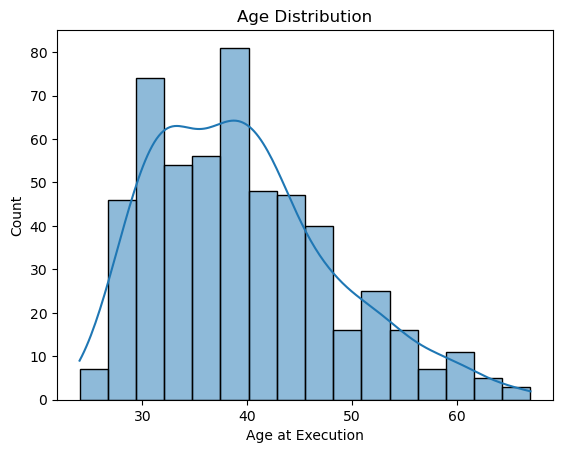

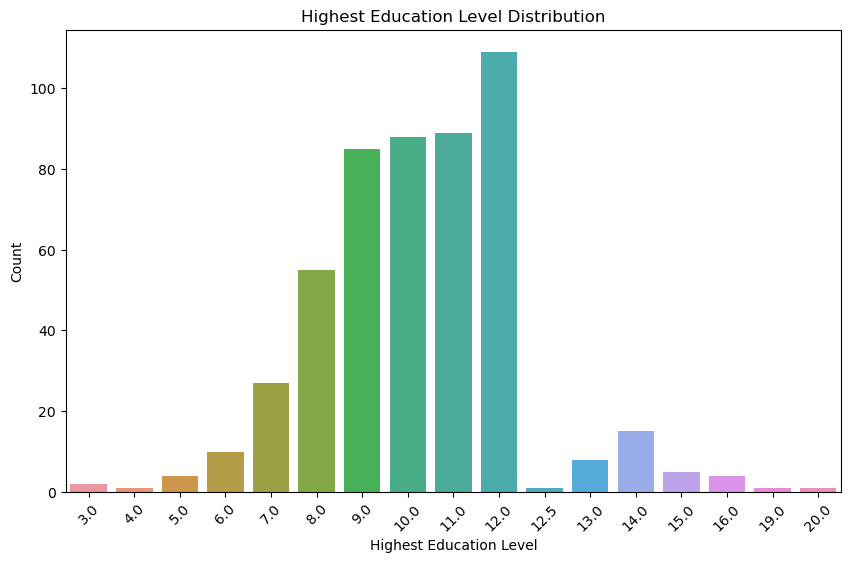

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
sns.histplot(data['Age at Execution'], kde=True)
plt.title('Age Distribution')
plt.show()

# Highest Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Highest Education Level', data=data)
plt.title('Highest Education Level Distribution')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here's a shorter version:

I faced an error using data.corr() because it only works with numeric data. My dataset has non-numeric columns like dates, causing errors.

To fix this, I need to:

1. Filter out only the numeric columns for the correlation calculation.
2. Handle any missing values in these columns.

This should let me compute the correlation matrix without errors. It's an extra step, but it'll ensure I'm working with clean data.

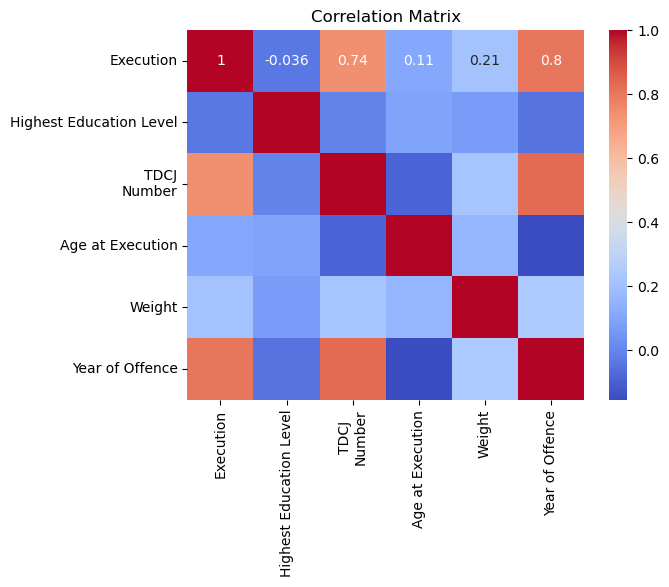

In [50]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check for missing values in numeric columns and fill them with the mean of the column
numeric_data = numeric_data.fillna(numeric_data.mean())

# Correlation Matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Naive Bayes Model

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_fscore_support

Text Vectorization using TF-IDF and Train-Test Split

In [52]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['Last Statement'])
y = data['Race']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes Accuracy: 0.49074074074074076
              precision    recall  f1-score   support

       Asian       0.00      0.00      0.00         1
       Black       0.46      0.37      0.41        35
    Hispanic       0.00      0.00      0.00        24
       White       0.50      0.83      0.62        48

    accuracy                           0.49       108
   macro avg       0.24      0.30      0.26       108
weighted avg       0.37      0.49      0.41       108



C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


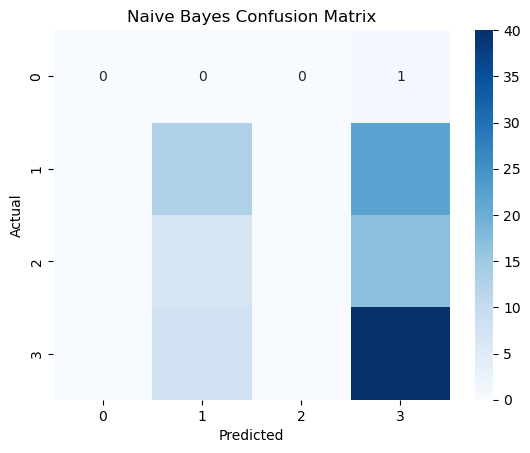

In [53]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Import necessary libraries for precision, recall, and F1-score calculations
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Naive Bayes
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Naive Bayes Precision: {nb_precision}")
print(f"Naive Bayes Recall: {nb_recall}")
print(f"Naive Bayes F1-Score: {nb_f1}")

Naive Bayes Precision: 0.3726851851851852
Naive Bayes Recall: 0.49074074074074076
Naive Bayes F1-Score: 0.4115226337448559


C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


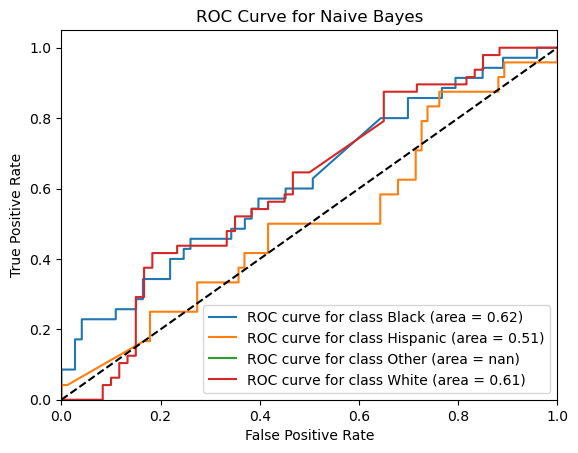

In [55]:
# ROC Curve and AUC for Naive Bayes
# Naive Bayes typically outputs probabilities for each class, which we need for the ROC curve.
y_pred_nb_proba = nb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_nb = {}
tpr_nb = {}
roc_auc_nb = {}
for i in range(len(nb_model.classes_)):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test, y_pred_nb_proba[:, i], pos_label=nb_model.classes_[i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC curves
plt.figure()
for i in range(len(nb_model.classes_)):
    plt.plot(fpr_nb[i], tpr_nb[i], label=f'ROC curve for class {nb_model.classes_[i]} (area = {roc_auc_nb[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

CNN model 

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Last Statement'])
sequences = tokenizer.texts_to_sequences(data['Last Statement'])
X_seq = pad_sequences(sequences, maxlen=100)

# Train-test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_encoded, test_size=0.2, random_state=42)

# Build CNN Model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = cnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate CNN Model
cnn_accuracy = cnn_model.evaluate(X_test_seq, y_test_seq)[1]
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/10


C:\Users\Atiq\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3782 - loss: -3.9129 - val_accuracy: 0.3023 - val_loss: -90.8234
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3953 - loss: -228.4046 - val_accuracy: 0.3023 - val_loss: -1515.3534
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3732 - loss: -2336.7024 - val_accuracy: 0.3023 - val_loss: -8697.2012
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3853 - loss: -11316.3359 - val_accuracy: 0.3023 - val_loss: -29987.2305
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4202 - loss: -33532.9844 - val_accuracy: 0.3023 - val_loss: -79041.8125
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4078 - loss: -85503.2969 - val_accuracy: 0.3023 - val_loss: -174698.5312
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3950 - loss: -202570.6719 - val_accuracy: 0.3023 - val_loss: -336597.3125
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy

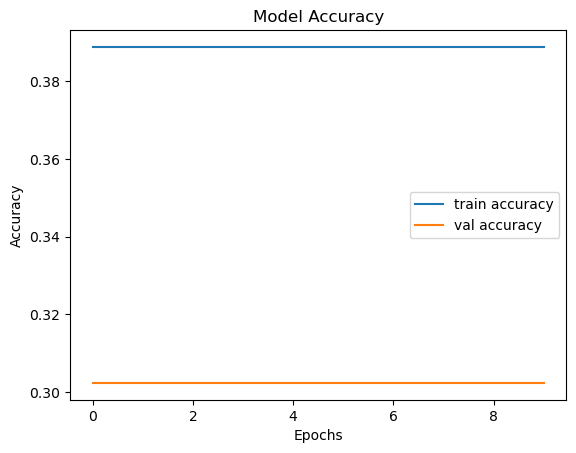

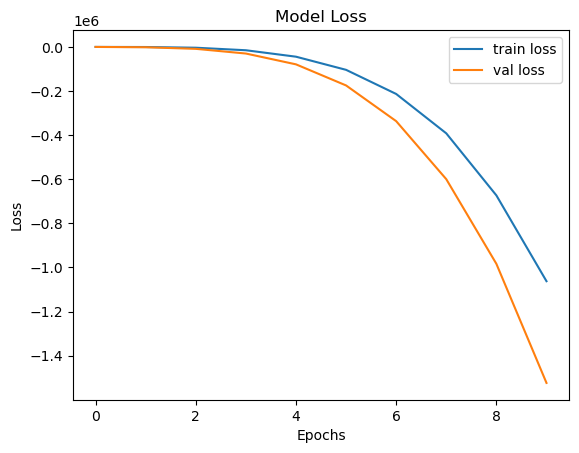

In [57]:
# Visualize Training History
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Additional Metrics and Comparison

In [58]:
# Additional metrics for CNN
y_pred_cnn_proba = cnn_model.predict(X_test_seq)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype(int)

# Calculate precision, recall, and F1-score for CNN
cnn_precision, cnn_recall, cnn_f1, _ = precision_recall_fscore_support(y_test_seq, y_pred_cnn, average='weighted')

print(f"CNN Precision: {cnn_precision}")
print(f"CNN Recall: {cnn_recall}")
print(f"CNN F1-Score: {cnn_f1}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
CNN Precision: 0.10502400548696844
CNN Recall: 0.32407407407407407
CNN F1-Score: 0.15863765863765864


C:\Users\Atiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Compare the Accuracy of Naive Bayes and CNN

In [59]:
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"CNN Accuracy: {cnn_accuracy}")

# Print additional metrics
print(f"Naive Bayes Precision: {nb_precision}")
print(f"Naive Bayes Recall: {nb_recall}")
print(f"Naive Bayes F1-Score: {nb_f1}")
print(f"CNN Precision: {cnn_precision}")
print(f"CNN Recall: {cnn_recall}")
print(f"CNN F1-Score: {cnn_f1}")

Naive Bayes Accuracy: 0.49074074074074076
CNN Accuracy: 0.32407405972480774
Naive Bayes Precision: 0.3726851851851852
Naive Bayes Recall: 0.49074074074074076
Naive Bayes F1-Score: 0.4115226337448559
CNN Precision: 0.10502400548696844
CNN Recall: 0.32407407407407407
CNN F1-Score: 0.15863765863765864
